<a href="https://colab.research.google.com/github/evro23x/abstract_dog/blob/cv/functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **abstract_dog: обработка фотографии молекулы** #

### Если у вас что-то не работает, то скорее всего вы не загрузили фотографию в файлы 

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

## **Функции для работы с изображениями** ##

### **Очищение картинки от шума:** 

На вход получаем имя изображения, которое нужно очистить

1.   Используем медианный фильтр для уменьшения уровня шума
2.   Нормализуем цвета в изображении
3. Применяем пороговую функцию, чтобы оставить только белые и черные цвета
4. Сохраняем в файл с названием "c_" + filename

Результат работы: изображение с названием "c_" + filename


In [0]:
'''
It cleans img from noise
'''
def clear_img(file_name):
  img = cv2.imread(file_name, 0)

  dilated_img = cv2.dilate(img, np.ones((7,7), np.uint8))
  bg_img = cv2.medianBlur(dilated_img, 21)
  diff_img = 255 - cv2.absdiff(img, bg_img)
  norm_img = diff_img.copy()
  cv2.normalize(diff_img, norm_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
  _, thr_img = cv2.threshold(norm_img, 230, 0, cv2.THRESH_TRUNC)
  cv2.normalize(thr_img, thr_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
  thr_img[thr_img < 240] = 0
  cv2.imwrite("c_" + file_name, thr_img)

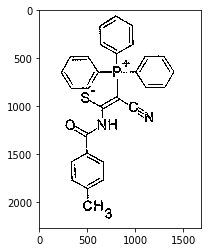

In [0]:
clear_img("1.jpg")

img = cv2.imread('c_1.jpg')

plt.imshow(img), plt.show()
plt.imsave('big.jpg', resize_img(img, 3))

### **Изменение размера изображения:** 

На вход получаем:

*   Изображение
*   Во сколько раз нужно увеличить или уменьшить изображение

Результат работы: сохраненное изображение с названием big



In [0]:
def resize_img(img, scale):
  return cv2.resize(img,(img.shape[1] * scale, img.shape[0] * scale))

### **Поиск вершин с помощью детектора Канни:** 

На вход получаем:

*   Изображение
*   Промежуток цветов, который мы будем учитывать [min, max]

Результат работы: на выходе массив вершин



In [0]:
def define_edged(img, min, max):
  return cv2.Canny(img, min, max)

### **Поиск контуров:** 

На вход получаем:

*   Массив вершин

Результат работы: массив со всеми координатами полученного контура

In [0]:
def get_contours(edged):
  return cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]

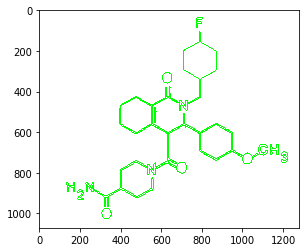

In [0]:
image = cv2.imread('3.jpg')

edged = define_edged(image, 30, 200)
contours, hierarchy = get_contours(edged)

image[::] = 255
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

plt.imshow(image)
plt.show()

### **Пример работы:** 

<function destroyAllWindows>

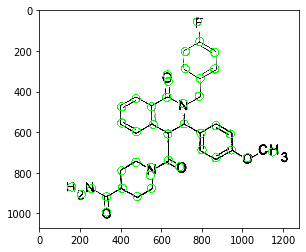

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt


img = cv2.imread('3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 30, 3, 0.04)
ret, dst = cv2.threshold(dst, 0.1*dst.max(), 255, 0)
dst = np.uint8(dst)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray, np.float32(centroids), (5,5), (-1,-1), criteria)

#for i in range(1, len(corners)):
    #print(corners[i])
#img[dst>0.1*dst.max()]=[0,0,255]
for i in range(1, len(corners)):
    #print(corners[i,0])
    cv2.circle(img, (int(corners[i,0]), int(corners[i,1])), 20, (0,255,0), 3)
plt.imshow(img)
cv2.waitKey(0)